In [16]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from matplotlib import pyplot as plt

In [17]:
#1
name = input()
id = input()
sum = 0

for i in id:
  sum += int(i)

print("Name : ", name)
print("Student ID : ", id)
print("Sum : ", sum)
print("Sum%5 : ", sum%5)

Siraprapa Padsa
61050290
Name :  Siraprapa Padsa
Student ID :  61050290
Sum :  23
Sum%5 :  3


In [18]:
#2
arr = np.random.rand(sum,2)
arr *= 100
arr //= 1
arr

array([[37., 54.],
       [17., 72.],
       [92., 98.],
       [74., 18.],
       [48., 70.],
       [21., 12.],
       [71., 67.],
       [88., 85.],
       [61., 27.],
       [18., 45.],
       [11., 11.],
       [56., 46.],
       [16.,  9.],
       [36., 59.],
       [22., 23.],
       [12.,  1.],
       [92., 25.],
       [54., 36.],
       [60., 67.],
       [21., 41.],
       [ 9., 69.],
       [38., 95.],
       [ 7., 58.]])

In [19]:
#3
label = ["x", "y"]
df_1 = pd.DataFrame(arr, columns = label)
df_1.to_csv("61050290.csv", index = False)

In [20]:
#4
df_2 = pd.read_excel("./Classification_Data.xlsx", "Fever")
df_2

,Body Temperature (C),Cough,Runny Nose,Disease
0,36.5,No,No,Normal
1,37.0,No,No,Normal
2,36.5,Yes,No,Normal
3,39.0,No,No,Dengue Fever
4,38.0,Yes,Yes,Cold
5,37.0,No,Yes,Cold
6,36.5,Yes,Yes,Cold
7,39.0,Yes,No,Dengue Fever
8,38.0,No,No,Dengue Fever
9,37.5,No,No,Cold


<function matplotlib.pyplot.show>

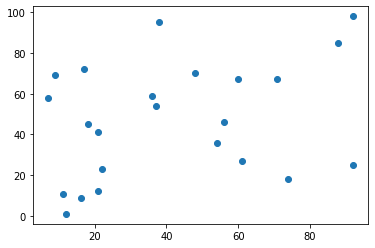

In [21]:
#5
df_3 = pd.read_csv("./61050290.csv")
df_3 = df_3.to_numpy()
df_x = df_3[ : ,  :1]
df_y = df_3[ : , 1: ]
plt.scatter(df_x, df_y)
plt.show

<function matplotlib.pyplot.show>

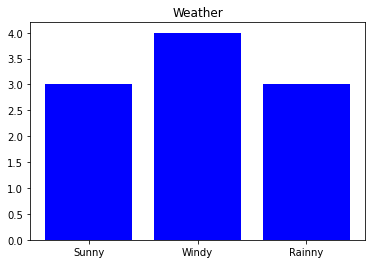

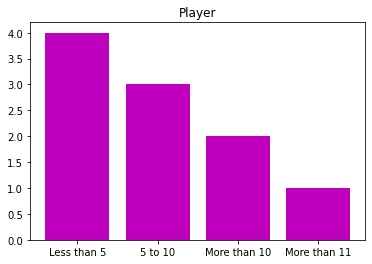

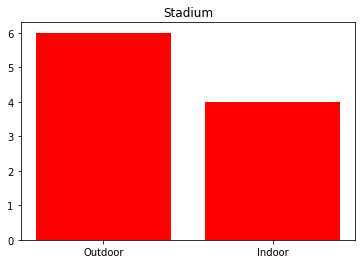

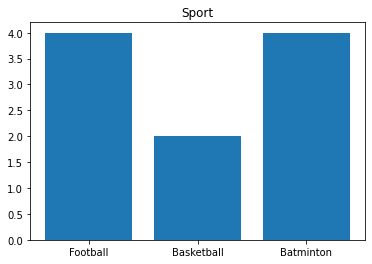

In [22]:
#6
#Bar Chart
data1 = ["Sunny", "Windy", "Rainny"]
height1 = [3, 4, 3]
data2 = ["Less than 5", "5 to 10", "More than 10", "More than 11"]
height2 = [4, 3, 2, 1]
data3 = ["Outdoor", "Indoor"]
height3 = [6, 4]
data4 = ["Football", "Basketball", "Batminton"]
height4 = [4, 2, 4]

plt.figure(0)
plt.title("Weather")
plt.bar(data1,height1, color='b')

plt.figure(1)
plt.title("Player")
plt.bar(data2, height2, color='m')

plt.figure(2)
plt.title("Stadium")
plt.bar(data3, height3, color='r')

plt.figure(3)
plt.title("Sport")
plt.bar(data4, height4)

plt.show

<function matplotlib.pyplot.show>

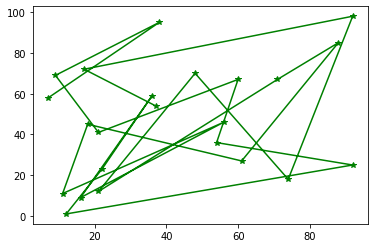

In [23]:
#7
plt.plot(df_x, df_y, color = 'g', marker = "*")
plt.show

In [24]:
#8
x = df_x
y = df_y
a = 0
for i in id[ :4]:
  a += int(i)

b = 0
for i in id[5: ]:
  b += int(i)

#Decision Tree Regression
dtr = DecisionTreeRegressor(criterion = 'mae')
dtr.fit(x, y)
dtr.predict([[a]])
dtr.predict([[b]])
print("R2 = ", dtr.score(x, y))

R2 =  0.8251418235227436


In [25]:
#9
df_4 = df_2
#Replace Temperature with numbers from 0-4 in Body Temperature (C) columbs
rename_dict={36.5 : 0, 37.0 : 1, 37.5 : 2, 38.0 : 3, 39.0 : 4}
df_4['Body Temperature (C)'].replace(rename_dict, inplace=True)
#Yes = 1, No = 0
rename_dict={"Yes" : 1, "No" : 0}
df_4['Cough'].replace(rename_dict, inplace=True)
df_4['Runny Nose'].replace(rename_dict, inplace=True)
#Normal = 0, Cold = 1, Dengue Fever = 2
rename_dict={"Normal" : 0, "Cold" : 1, "Dengue Fever" : 2}
df_4['Disease'].replace(rename_dict, inplace=True)
prob = [1, 1, 0]

df_4.to_numpy()
x = df_4.iloc[ : , :3]
y = df_4.iloc[ : ,3: ]

#Random Forest Classification (criterion = “gini”)
rfc = RandomForestClassifier(criterion = 'gini')
rfc.fit(x, y)
rfc.predict([[2, 2, 2]])
print(rfc.predict_proba([prob]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[0.78 0.16 0.06]]


In [26]:
#10
x = df_3
#KMean Clustering - Cluster = 4
kmc = KMeans(n_clusters = 4)
kmc.fit(x)
kmc.labels_
print(kmc.predict([[a, b]]))

[2]
